# Day 3 — Exercise 2: Answer Quality and Cost Analysis

## 🎯 **Learning Objective**
Evaluate answer quality and operational costs of a RAG pipeline using automated evaluations, embedding similarity, and RAGAS-style metrics to balance performance with cost efficiency.

## 📚 **What You'll Learn**
- How to assess answer quality using multiple evaluation approaches
- Implementation of automated evaluation metrics (faithfulness, relevance, context precision)
- Cost analysis and optimization techniques for enterprise RAG systems
- Trade-off analysis between quality and operational costs
- Integration with LightLLM for production-grade cost tracking

## 🏢 **Enterprise Context**
In production RAG systems, answer quality and cost management are critical for:
- **Business Value**: High-quality answers drive user satisfaction and business outcomes
- **Cost Control**: Optimizing token usage and API calls for sustainable operations
- **Quality Assurance**: Automated evaluation ensures consistent performance
- **ROI Optimization**: Balancing quality improvements with cost implications

---

## 📋 **Exercise Structure & Navigation**

### **🧭 Navigation Guide**
| Section | What You'll Do | Expected Outcome | Time |
|---------|----------------|------------------|------|
| **Theory & Foundation** | Understand answer quality principles | Knowledge of evaluation frameworks | 15 min |
| **Simple Implementation** | Build basic quality metrics | Working evaluation system | 30 min |
| **Intermediate Level** | Add RAGAS-style metrics | Advanced quality assessment | 45 min |
| **Advanced Implementation** | Cost-quality optimization | Production-ready analysis | 30 min |
| **Enterprise Integration** | LightLLM cost tracking | Complete evaluation pipeline | 20 min |

### **🔍 Code Block Navigation**
Each code block includes:
- **🎯 Purpose**: What the code accomplishes
- **📊 Expected Output**: What you should see
- **💡 Interpretation**: How to understand the results
- **⚠️ Troubleshooting**: Common issues and solutions

---

## 📖 **Prerequisites**
- **Completed**: Day 3, Exercise 1 (Evaluation Dataset and Retrieval Metrics)
- **Knowledge**: Basic understanding of RAG systems and evaluation metrics
- **Tools**: LightLLM, NumPy, Pandas, Matplotlib, Sentence Transformers

---

**Estimated Time**: 2.5 hours  
**Difficulty Level**: Intermediate to Advanced  
**Enterprise Focus**: Production-ready evaluation and cost optimization


## 🧠 **Theory & Foundation: Answer Quality Evaluation**

### **Why Answer Quality Matters in Enterprise RAG Systems**

Answer quality is the cornerstone of successful RAG deployments. Unlike traditional search systems that return documents, RAG systems must provide accurate, relevant, and actionable answers that directly impact business outcomes.

### **Key Quality Dimensions**

#### **1. Faithfulness (Factual Accuracy)**
- **Definition**: How well the answer reflects the retrieved context
- **Enterprise Impact**: Prevents misinformation that could damage credibility
- **Measurement**: Compare answer claims against source documents

#### **2. Relevance (Answer Appropriateness)**
- **Definition**: How well the answer addresses the user's question
- **Enterprise Impact**: Ensures users get useful information quickly
- **Measurement**: Assess semantic alignment between query and answer

#### **3. Context Precision (Source Utilization)**
- **Definition**: How efficiently the system uses retrieved information
- **Enterprise Impact**: Optimizes retrieval depth and reduces noise
- **Measurement**: Analyze what percentage of retrieved context is relevant

#### **4. Answer Completeness**
- **Definition**: Whether the answer fully addresses all aspects of the query
- **Enterprise Impact**: Reduces follow-up questions and support tickets
- **Measurement**: Check if all query components are addressed

### **Cost-Quality Trade-offs in Enterprise Systems**

#### **Cost Factors:**
- **Token Usage**: Input tokens (query + context) + Output tokens (answer)
- **API Calls**: Number of LLM requests per user interaction
- **Processing Time**: Latency affects user experience and infrastructure costs
- **Storage**: Vector database and document storage costs

#### **Quality Factors:**
- **Retrieval Depth**: More documents = higher recall but higher costs
- **Context Length**: Longer context = better answers but more tokens
- **Model Selection**: Larger models = better quality but higher costs

### **Enterprise Evaluation Framework**

#### **Automated Evaluation Metrics:**
1. **Embedding Similarity**: Compare query-answer and context-answer similarity
2. **Faithfulness Scoring**: Use LLMs to evaluate factual consistency
3. **Relevance Assessment**: Measure semantic alignment between query and answer
4. **Citation Quality**: Evaluate source attribution and accuracy

#### **Cost Optimization Strategies:**
1. **Dynamic Context Selection**: Use only relevant portions of retrieved documents
2. **Query Classification**: Route simple queries to smaller models
3. **Caching**: Store and reuse similar query-answer pairs
4. **Batch Processing**: Combine multiple queries for efficiency

### **Production Considerations**

#### **Monitoring & Alerting:**
- **Quality Degradation**: Alert when answer quality drops below thresholds
- **Cost Anomalies**: Monitor for unexpected cost spikes
- **Performance Metrics**: Track latency and throughput

#### **Business Alignment:**
- **User Satisfaction**: Correlate quality metrics with user feedback
- **Business Impact**: Measure how quality affects key business metrics
- **ROI Analysis**: Balance quality improvements against cost increases


## 🚀 **Simple Implementation: Building Basic Quality Metrics**

### **Step 1: Environment Setup and Data Preparation**

**🎯 Purpose**: Initialize the evaluation environment and prepare sample data for answer quality assessment.

**📊 Expected Output**: Libraries loaded, sample RAG responses created, and evaluation framework initialized.

**💡 Interpretation**: This sets up the foundation for measuring answer quality across different scenarios.

**⚠️ Troubleshooting**: If libraries fail to load, install missing packages with `pip install package-name`.


In [1]:
# Import essential libraries for answer quality evaluation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple, Any
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up professional plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Configure pandas for better display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 60)

print("📚 Libraries imported successfully!")
print(f"🕒 Exercise started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("🎯 Ready to evaluate answer quality and analyze costs!")

# Create sample RAG evaluation data
# This simulates real-world RAG responses with varying quality levels
sample_evaluation_data = {
    "queries": [
        "How do I reset my password?",
        "What are your business hours?",
        "How can I cancel my subscription?",
        "What payment methods do you accept?",
        "How do I update my billing information?"
    ],
    
    "contexts": [
        "Account Security: Reset your password by clicking 'Forgot Password' on the login page. You'll receive an email with reset instructions. The link expires in 24 hours for security.",
        "Customer Support: Our support team is available Monday-Friday 9 AM - 6 PM EST, Saturday 10 AM - 4 PM EST. Closed on Sundays and major holidays.",
        "Subscription Management: Cancel your subscription by going to Settings > Billing > Cancel Subscription. You'll retain access until the end of your billing period.",
        "Payment Options: We accept all major credit cards (Visa, MasterCard, American Express), PayPal, and bank transfers. All payments are processed securely through Stripe.",
        "Billing Updates: Update your billing information in Settings > Billing > Payment Methods. Changes take effect immediately for future charges."
    ],
    
    "answers": [
        "To reset your password, click the 'Forgot Password' link on the login page. You'll receive an email with reset instructions within a few minutes. The reset link is valid for 24 hours.",
        "Our customer support team is available Monday through Friday from 9 AM to 6 PM Eastern Time, and Saturday from 10 AM to 4 PM Eastern Time. We're closed on Sundays and major holidays.",
        "You can cancel your subscription by navigating to Settings, then Billing, and selecting 'Cancel Subscription'. Your access will continue until the end of your current billing period.",
        "We accept all major credit cards including Visa, MasterCard, and American Express, as well as PayPal and bank transfers. All payments are processed securely through our payment processor.",
        "To update your billing information, go to Settings, then Billing, and select 'Payment Methods'. Any changes will apply to future charges immediately."
    ],
    
    "ground_truth": [
        "Click 'Forgot Password' on login page, check email for reset link valid 24 hours",
        "Support hours: Mon-Fri 9 AM-6 PM EST, Sat 10 AM-4 PM EST, closed Sundays/holidays",
        "Cancel via Settings > Billing > Cancel Subscription, access until billing period ends",
        "Accepts Visa, MasterCard, AmEx, PayPal, bank transfers via secure processor",
        "Update in Settings > Billing > Payment Methods, changes apply to future charges"
    ]
}

print(f"\n✅ Created sample evaluation dataset:")
print(f"   📝 Queries: {len(sample_evaluation_data['queries'])}")
print(f"   📄 Contexts: {len(sample_evaluation_data['contexts'])}")
print(f"   💬 Answers: {len(sample_evaluation_data['answers'])}")
print(f"   🎯 Ground Truth: {len(sample_evaluation_data['ground_truth'])}")
print("🎯 Sample data ready for quality evaluation!")


📚 Libraries imported successfully!
🕒 Exercise started at: 2025-09-20 18:53:13
🎯 Ready to evaluate answer quality and analyze costs!

✅ Created sample evaluation dataset:
   📝 Queries: 5
   📄 Contexts: 5
   💬 Answers: 5
   🎯 Ground Truth: 5
🎯 Sample data ready for quality evaluation!


### **Step 2: Basic Answer Quality Metrics Implementation**

**🎯 Purpose**: Implement fundamental answer quality metrics including Exact Match (EM) and F1 scores for baseline evaluation.

**📊 Expected Output**: A working AnswerQualityEvaluator class with EM and F1 scoring capabilities.

**💡 Interpretation**: 
- **EM Score**: Perfect matches (1.0) vs. partial matches (0.0)
- **F1 Score**: Balances precision and recall of answer content
- **Higher scores** indicate better answer quality

**⚠️ Troubleshooting**: If tokenization issues occur, ensure the text processing handles special characters properly.


In [2]:
import re
from collections import Counter

class AnswerQualityEvaluator:
    """
    Basic answer quality evaluator implementing standard NLP metrics.
    
    This class provides:
    - Exact Match (EM) scoring for perfect answer matches
    - F1 scoring for partial answer matches
    - Token-level analysis for detailed evaluation
    """
    
    def __init__(self):
        self.evaluation_history = []
        
    def normalize_text(self, text: str) -> str:
        """
        Normalize text for consistent comparison.
        
        Args:
            text: Input text to normalize
            
        Returns:
            Normalized text string
        """
        # Convert to lowercase
        text = text.lower()
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text)
        
        # Remove punctuation for basic comparison
        text = re.sub(r'[^\w\s]', '', text)
        
        return text.strip()
    
    def tokenize(self, text: str) -> List[str]:
        """
        Simple tokenization for word-level analysis.
        
        Args:
            text: Input text to tokenize
            
        Returns:
            List of tokens
        """
        normalized = self.normalize_text(text)
        return normalized.split()
    
    def exact_match(self, predicted: str, ground_truth: str) -> float:
        """
        Calculate Exact Match score.
        
        Args:
            predicted: Generated answer
            ground_truth: Reference answer
            
        Returns:
            EM score (1.0 for exact match, 0.0 otherwise)
        """
        pred_normalized = self.normalize_text(predicted)
        gt_normalized = self.normalize_text(ground_truth)
        
        return 1.0 if pred_normalized == gt_normalized else 0.0
    
    def f1_score(self, predicted: str, ground_truth: str) -> float:
        """
        Calculate F1 score between predicted and ground truth answers.
        
        Args:
            predicted: Generated answer
            ground_truth: Reference answer
            
        Returns:
            F1 score (0.0 to 1.0)
        """
        pred_tokens = set(self.tokenize(predicted))
        gt_tokens = set(self.tokenize(ground_truth))
        
        if len(pred_tokens) == 0 and len(gt_tokens) == 0:
            return 1.0
        
        if len(pred_tokens) == 0 or len(gt_tokens) == 0:
            return 0.0
        
        # Calculate precision and recall
        common_tokens = pred_tokens.intersection(gt_tokens)
        
        precision = len(common_tokens) / len(pred_tokens)
        recall = len(common_tokens) / len(gt_tokens)
        
        # Calculate F1 score
        if precision + recall == 0:
            return 0.0
        
        f1 = 2 * (precision * recall) / (precision + recall)
        return f1
    
    def evaluate_answer(self, predicted: str, ground_truth: str) -> Dict[str, float]:
        """
        Evaluate a single answer against ground truth.
        
        Args:
            predicted: Generated answer
            ground_truth: Reference answer
            
        Returns:
            Dictionary with evaluation metrics
        """
        em_score = self.exact_match(predicted, ground_truth)
        f1_score = self.f1_score(predicted, ground_truth)
        
        # Calculate token statistics
        pred_tokens = self.tokenize(predicted)
        gt_tokens = self.tokenize(ground_truth)
        
        result = {
            'exact_match': em_score,
            'f1_score': f1_score,
            'predicted_tokens': len(pred_tokens),
            'ground_truth_tokens': len(gt_tokens),
            'token_overlap': len(set(pred_tokens).intersection(set(gt_tokens))),
            'precision': len(set(pred_tokens).intersection(set(gt_tokens))) / max(len(pred_tokens), 1),
            'recall': len(set(pred_tokens).intersection(set(gt_tokens))) / max(len(gt_tokens), 1)
        }
        
        # Store evaluation history
        self.evaluation_history.append({
            'predicted': predicted,
            'ground_truth': ground_truth,
            'metrics': result,
            'timestamp': datetime.now().isoformat()
        })
        
        return result
    
    def evaluate_batch(self, predictions: List[str], ground_truths: List[str]) -> Dict[str, Any]:
        """
        Evaluate a batch of answers.
        
        Args:
            predictions: List of generated answers
            ground_truths: List of reference answers
            
        Returns:
            Dictionary with aggregate metrics and individual results
        """
        if len(predictions) != len(ground_truths):
            raise ValueError("Predictions and ground truths must have the same length")
        
        individual_results = []
        for pred, gt in zip(predictions, ground_truths):
            result = self.evaluate_answer(pred, gt)
            individual_results.append(result)
        
        # Calculate aggregate metrics
        aggregate_metrics = {
            'exact_match_mean': np.mean([r['exact_match'] for r in individual_results]),
            'exact_match_std': np.std([r['exact_match'] for r in individual_results]),
            'f1_mean': np.mean([r['f1_score'] for r in individual_results]),
            'f1_std': np.std([r['f1_score'] for r in individual_results]),
            'precision_mean': np.mean([r['precision'] for r in individual_results]),
            'recall_mean': np.mean([r['recall'] for r in individual_results]),
            'total_samples': len(individual_results)
        }
        
        return {
            'individual_results': individual_results,
            'aggregate_metrics': aggregate_metrics
        }

# Initialize the evaluator
quality_evaluator = AnswerQualityEvaluator()

print("✅ AnswerQualityEvaluator initialized successfully!")
print("📊 Available metrics: Exact Match, F1 Score, Precision, Recall")
print("🎯 Ready to evaluate answer quality!")


✅ AnswerQualityEvaluator initialized successfully!
📊 Available metrics: Exact Match, F1 Score, Precision, Recall
🎯 Ready to evaluate answer quality!


### **Step 3: Testing Basic Quality Metrics**

**🎯 Purpose**: Test our quality evaluator with sample data to understand how the metrics work in practice.

**📊 Expected Output**: Individual and aggregate quality scores for each query-answer pair.

**💡 Interpretation**: 
- **EM Score 1.0**: Perfect answer match
- **F1 Score > 0.8**: High-quality answer with good token overlap
- **F1 Score 0.5-0.8**: Moderate quality with some relevant content
- **F1 Score < 0.5**: Low quality, needs improvement

**⚠️ Troubleshooting**: If scores are unexpectedly low, check if text normalization is working correctly.


In [3]:
# Test the basic quality evaluator with our sample data
print("🧪 Testing Answer Quality Metrics")
print("=" * 50)

# Evaluate each answer against its ground truth
batch_results = quality_evaluator.evaluate_batch(
    sample_evaluation_data['answers'],
    sample_evaluation_data['ground_truth']
)

# Display individual results
print("\n📊 INDIVIDUAL RESULTS:")
print("-" * 50)

for i, (query, result) in enumerate(zip(sample_evaluation_data['queries'], batch_results['individual_results'])):
    print(f"\n{i+1}. Query: {query}")
    print(f"   📝 Answer: {sample_evaluation_data['answers'][i][:80]}...")
    print(f"   🎯 Ground Truth: {sample_evaluation_data['ground_truth'][i][:80]}...")
    print(f"   📈 Metrics:")
    print(f"      • Exact Match: {result['exact_match']:.3f}")
    print(f"      • F1 Score: {result['f1_score']:.3f}")
    print(f"      • Precision: {result['precision']:.3f}")
    print(f"      • Recall: {result['recall']:.3f}")
    print(f"      • Token Overlap: {result['token_overlap']}/{result['predicted_tokens']}")

# Display aggregate results
print(f"\n📈 AGGREGATE METRICS:")
print("-" * 50)
agg_metrics = batch_results['aggregate_metrics']
print(f"Total Samples: {agg_metrics['total_samples']}")
print(f"Exact Match: {agg_metrics['exact_match_mean']:.3f} ± {agg_metrics['exact_match_std']:.3f}")
print(f"F1 Score: {agg_metrics['f1_mean']:.3f} ± {agg_metrics['f1_std']:.3f}")
print(f"Precision: {agg_metrics['precision_mean']:.3f}")
print(f"Recall: {agg_metrics['recall_mean']:.3f}")

# Analyze performance
print(f"\n🎯 PERFORMANCE ANALYSIS:")
print("-" * 50)

if agg_metrics['exact_match_mean'] > 0.8:
    print("✅ Excellent Exact Match performance - answers are highly accurate")
elif agg_metrics['exact_match_mean'] > 0.5:
    print("⚠️  Moderate Exact Match performance - some answers need improvement")
else:
    print("❌ Low Exact Match performance - significant accuracy issues")

if agg_metrics['f1_mean'] > 0.7:
    print("✅ Good F1 Score - answers contain relevant information")
elif agg_metrics['f1_mean'] > 0.5:
    print("⚠️  Moderate F1 Score - answers have some relevant content")
else:
    print("❌ Low F1 Score - answers lack relevant information")

print(f"\n✅ Basic quality evaluation completed!")
print("🎯 Ready to implement advanced RAGAS-style metrics!")


🧪 Testing Answer Quality Metrics

📊 INDIVIDUAL RESULTS:
--------------------------------------------------

1. Query: How do I reset my password?
   📝 Answer: To reset your password, click the 'Forgot Password' link on the login page. You'...
   🎯 Ground Truth: Click 'Forgot Password' on login page, check email for reset link valid 24 hours...
   📈 Metrics:
      • Exact Match: 0.000
      • F1 Score: 0.650
      • Precision: 0.406
      • Recall: 0.929
      • Token Overlap: 13/32

2. Query: What are your business hours?
   📝 Answer: Our customer support team is available Monday through Friday from 9 AM to 6 PM E...
   🎯 Ground Truth: Support hours: Mon-Fri 9 AM-6 PM EST, Sat 10 AM-4 PM EST, closed Sundays/holiday...
   📈 Metrics:
      • Exact Match: 0.000
      • F1 Score: 0.256
      • Precision: 0.147
      • Recall: 0.357
      • Token Overlap: 5/34

3. Query: How can I cancel my subscription?
   📝 Answer: You can cancel your subscription by navigating to Settings, then Billing, 

## 🔧 **Intermediate Level: RAGAS-Style Metrics and Advanced Evaluation**

### **Step 4: Implementing Embedding-Based Similarity Metrics**

**🎯 Purpose**: Add semantic similarity evaluation using embeddings to measure answer quality beyond exact text matching.

**📊 Expected Output**: Advanced evaluator with embedding similarity, faithfulness, and relevance scoring.

**💡 Interpretation**: 
- **Context-Answer Similarity**: How well the answer reflects the retrieved context
- **Query-Answer Similarity**: How well the answer addresses the original query
- **Faithfulness Score**: Measures factual consistency between context and answer

**⚠️ Troubleshooting**: If embedding models fail to load, the system will fall back to simple text-based metrics.


In [4]:
# Advanced Answer Quality Evaluator with RAGAS-style metrics
try:
    from sentence_transformers import SentenceTransformer
    import sklearn.metrics.pairwise as pairwise
    EMBEDDING_MODELS_AVAILABLE = True
    print("✅ Sentence Transformers available for embedding-based evaluation")
except ImportError:
    EMBEDDING_MODELS_AVAILABLE = False
    print("⚠️  Sentence Transformers not available - using fallback methods")

class AdvancedAnswerQualityEvaluator(AnswerQualityEvaluator):
    """
    Advanced answer quality evaluator implementing RAGAS-style metrics.
    
    This class extends basic evaluation with:
    - Embedding-based similarity metrics
    - Faithfulness scoring (context-answer consistency)
    - Relevance scoring (query-answer alignment)
    - Context precision (efficient context utilization)
    """
    
    def __init__(self):
        super().__init__()
        self.embedding_model = None
        self.embedding_available = EMBEDDING_MODELS_AVAILABLE
        
        if self.embedding_available:
            try:
                # Use a lightweight model for demonstration
                self.embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
                print("✅ Embedding model loaded successfully")
            except Exception as e:
                print(f"⚠️  Could not load embedding model: {e}")
                self.embedding_available = False
    
    def cosine_similarity(self, text1: str, text2: str) -> float:
        """
        Calculate cosine similarity between two texts using embeddings.
        
        Args:
            text1: First text
            text2: Second text
            
        Returns:
            Cosine similarity score (0.0 to 1.0)
        """
        if not self.embedding_available:
            # Fallback to simple word overlap
            return self._word_overlap_similarity(text1, text2)
        
        try:
            # Get embeddings
            embeddings = self.embedding_model.encode([text1, text2])
            
            # Calculate cosine similarity
            similarity = pairwise.cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
            return float(similarity)
        except Exception as e:
            print(f"⚠️  Embedding similarity failed: {e}")
            return self._word_overlap_similarity(text1, text2)
    
    def _word_overlap_similarity(self, text1: str, text2: str) -> float:
        """Fallback similarity using word overlap."""
        tokens1 = set(self.tokenize(text1))
        tokens2 = set(self.tokenize(text2))
        
        if len(tokens1) == 0 or len(tokens2) == 0:
            return 0.0
        
        intersection = len(tokens1.intersection(tokens2))
        union = len(tokens1.union(tokens2))
        
        return intersection / union if union > 0 else 0.0
    
    def faithfulness_score(self, answer: str, context: str) -> float:
        """
        Calculate faithfulness score - how well the answer reflects the context.
        
        Args:
            answer: Generated answer
            context: Retrieved context
            
        Returns:
            Faithfulness score (0.0 to 1.0)
        """
        # Calculate semantic similarity between answer and context
        similarity = self.cosine_similarity(answer, context)
        
        # Additional check: ensure answer doesn't introduce new information not in context
        answer_tokens = set(self.tokenize(answer))
        context_tokens = set(self.tokenize(context))
        
        # Calculate what percentage of answer tokens are covered by context
        covered_tokens = answer_tokens.intersection(context_tokens)
        coverage = len(covered_tokens) / len(answer_tokens) if len(answer_tokens) > 0 else 1.0
        
        # Combine similarity and coverage for faithfulness score
        faithfulness = (similarity * 0.7) + (coverage * 0.3)
        return min(faithfulness, 1.0)
    
    def relevance_score(self, query: str, answer: str) -> float:
        """
        Calculate relevance score - how well the answer addresses the query.
        
        Args:
            query: Original query
            answer: Generated answer
            
        Returns:
            Relevance score (0.0 to 1.0)
        """
        return self.cosine_similarity(query, answer)
    
    def context_precision(self, query: str, contexts: List[str], answer: str) -> float:
        """
        Calculate context precision - how efficiently the system uses retrieved context.
        
        Args:
            query: Original query
            contexts: List of retrieved contexts
            answer: Generated answer
            
        Returns:
            Context precision score (0.0 to 1.0)
        """
        if not contexts:
            return 0.0
        
        # Calculate relevance of each context to the query
        context_relevances = []
        for context in contexts:
            relevance = self.cosine_similarity(query, context)
            context_relevances.append(relevance)
        
        # Calculate how much of the answer is covered by the most relevant contexts
        # For simplicity, we'll use the top context
        if context_relevances:
            top_relevance = max(context_relevances)
            answer_context_similarity = self.cosine_similarity(answer, contexts[context_relevances.index(top_relevance)])
            
            # Context precision combines relevance and answer coverage
            precision = (top_relevance * 0.6) + (answer_context_similarity * 0.4)
            return min(precision, 1.0)
        
        return 0.0
    
    def evaluate_advanced_metrics(self, query: str, contexts: List[str], answer: str, ground_truth: str) -> Dict[str, float]:
        """
        Evaluate answer using advanced RAGAS-style metrics.
        
        Args:
            query: Original query
            contexts: Retrieved contexts
            answer: Generated answer
            ground_truth: Reference answer
            
        Returns:
            Dictionary with all evaluation metrics
        """
        # Get basic metrics
        basic_metrics = self.evaluate_answer(answer, ground_truth)
        
        # Calculate advanced metrics
        advanced_metrics = {
            'faithfulness': self.faithfulness_score(answer, ' '.join(contexts)),
            'relevance': self.relevance_score(query, answer),
            'context_precision': self.context_precision(query, contexts, answer)
        }
        
        # Combine all metrics
        all_metrics = {**basic_metrics, **advanced_metrics}
        
        # Calculate overall quality score (weighted average)
        weights = {
            'exact_match': 0.2,
            'f1_score': 0.3,
            'faithfulness': 0.25,
            'relevance': 0.15,
            'context_precision': 0.1
        }
        
        overall_score = sum(all_metrics[metric] * weights[metric] for metric in weights.keys())
        all_metrics['overall_quality'] = overall_score
        
        return all_metrics

# Initialize advanced evaluator
advanced_evaluator = AdvancedAnswerQualityEvaluator()

print(f"\n✅ Advanced evaluator initialized!")
print(f"🔧 Embedding-based evaluation: {'Available' if advanced_evaluator.embedding_available else 'Fallback mode'}")
print("📊 Advanced metrics: Faithfulness, Relevance, Context Precision")
print("🎯 Ready for comprehensive answer quality assessment!")


✅ Sentence Transformers available for embedding-based evaluation
✅ Embedding model loaded successfully

✅ Advanced evaluator initialized!
🔧 Embedding-based evaluation: Available
📊 Advanced metrics: Faithfulness, Relevance, Context Precision
🎯 Ready for comprehensive answer quality assessment!


### **Step 5: Testing Advanced RAGAS-Style Metrics**

**🎯 Purpose**: Test the advanced evaluator with RAGAS-style metrics to see how it performs on semantic similarity and faithfulness.

**📊 Expected Output**: Comprehensive evaluation results including faithfulness, relevance, and context precision scores.

**💡 Interpretation**: 
- **Faithfulness > 0.8**: Answer accurately reflects the retrieved context
- **Relevance > 0.7**: Answer appropriately addresses the query
- **Context Precision > 0.6**: System efficiently uses retrieved information
- **Overall Quality**: Weighted combination of all metrics

**⚠️ Troubleshooting**: If embedding similarity scores are low, it may indicate the embedding model needs fine-tuning for your domain.


In [5]:
# Test advanced RAGAS-style metrics
print("🔬 Testing Advanced RAGAS-Style Metrics")
print("=" * 60)

# Evaluate each sample with advanced metrics
advanced_results = []

for i, (query, context, answer, ground_truth) in enumerate(zip(
    sample_evaluation_data['queries'],
    sample_evaluation_data['contexts'],
    sample_evaluation_data['answers'],
    sample_evaluation_data['ground_truth']
)):
    print(f"\n📝 Sample {i+1}: {query}")
    
    # Evaluate with advanced metrics
    metrics = advanced_evaluator.evaluate_advanced_metrics(
        query=query,
        contexts=[context],  # Convert single context to list
        answer=answer,
        ground_truth=ground_truth
    )
    
    advanced_results.append({
        'query': query,
        'context': context,
        'answer': answer,
        'ground_truth': ground_truth,
        'metrics': metrics
    })
    
    # Display results
    print(f"   🎯 Basic Metrics:")
    print(f"      • Exact Match: {metrics['exact_match']:.3f}")
    print(f"      • F1 Score: {metrics['f1_score']:.3f}")
    print(f"   🔬 Advanced Metrics:")
    print(f"      • Faithfulness: {metrics['faithfulness']:.3f}")
    print(f"      • Relevance: {metrics['relevance']:.3f}")
    print(f"      • Context Precision: {metrics['context_precision']:.3f}")
    print(f"   📊 Overall Quality: {metrics['overall_quality']:.3f}")

# Calculate aggregate advanced metrics
print(f"\n📈 AGGREGATE ADVANCED METRICS:")
print("-" * 60)

# Extract metrics for analysis
all_metrics = [result['metrics'] for result in advanced_results]

aggregate_metrics = {
    'exact_match_mean': np.mean([m['exact_match'] for m in all_metrics]),
    'exact_match_std': np.std([m['exact_match'] for m in all_metrics]),
    'f1_mean': np.mean([m['f1_score'] for m in all_metrics]),
    'f1_std': np.std([m['f1_score'] for m in all_metrics]),
    'faithfulness_mean': np.mean([m['faithfulness'] for m in all_metrics]),
    'faithfulness_std': np.std([m['faithfulness'] for m in all_metrics]),
    'relevance_mean': np.mean([m['relevance'] for m in all_metrics]),
    'relevance_std': np.std([m['relevance'] for m in all_metrics]),
    'context_precision_mean': np.mean([m['context_precision'] for m in all_metrics]),
    'context_precision_std': np.std([m['context_precision'] for m in all_metrics]),
    'overall_quality_mean': np.mean([m['overall_quality'] for m in all_metrics]),
    'overall_quality_std': np.std([m['overall_quality'] for m in all_metrics])
}

# Display aggregate results
for metric_name, mean_val in aggregate_metrics.items():
    if metric_name.endswith('_mean'):
        std_val = aggregate_metrics[metric_name.replace('_mean', '_std')]
        print(f"{metric_name.replace('_mean', '').replace('_', ' ').title():20} | {mean_val:.3f} ± {std_val:.3f}")

# Performance analysis
print(f"\n🎯 ADVANCED PERFORMANCE ANALYSIS:")
print("-" * 60)

# Faithfulness analysis
if aggregate_metrics['faithfulness_mean'] > 0.8:
    print("✅ Excellent Faithfulness - answers accurately reflect context")
elif aggregate_metrics['faithfulness_mean'] > 0.6:
    print("⚠️  Good Faithfulness - some answers may contain minor inaccuracies")
else:
    print("❌ Poor Faithfulness - answers often don't match context")

# Relevance analysis
if aggregate_metrics['relevance_mean'] > 0.7:
    print("✅ Excellent Relevance - answers well address queries")
elif aggregate_metrics['relevance_mean'] > 0.5:
    print("⚠️  Good Relevance - answers mostly address queries")
else:
    print("❌ Poor Relevance - answers often miss the point")

# Context precision analysis
if aggregate_metrics['context_precision_mean'] > 0.6:
    print("✅ Good Context Precision - efficient use of retrieved information")
elif aggregate_metrics['context_precision_mean'] > 0.4:
    print("⚠️  Moderate Context Precision - some context may be irrelevant")
else:
    print("❌ Poor Context Precision - inefficient use of retrieved context")

# Overall quality assessment
overall_score = aggregate_metrics['overall_quality_mean']
if overall_score > 0.8:
    print(f"🏆 Excellent Overall Quality ({overall_score:.3f}) - production ready")
elif overall_score > 0.6:
    print(f"✅ Good Overall Quality ({overall_score:.3f}) - minor improvements needed")
else:
    print(f"⚠️  Moderate Overall Quality ({overall_score:.3f}) - significant improvements needed")

print(f"\n✅ Advanced evaluation completed!")
print("🎯 Ready to implement cost analysis and optimization!")


🔬 Testing Advanced RAGAS-Style Metrics

📝 Sample 1: How do I reset my password?
   🎯 Basic Metrics:
      • Exact Match: 0.000
      • F1 Score: 0.650
   🔬 Advanced Metrics:
      • Faithfulness: 0.817
      • Relevance: 0.738
      • Context Precision: 0.769
   📊 Overall Quality: 0.587

📝 Sample 2: What are your business hours?
   🎯 Basic Metrics:
      • Exact Match: 0.000
      • F1 Score: 0.256
   🔬 Advanced Metrics:
      • Faithfulness: 0.872
      • Relevance: 0.462
      • Context Precision: 0.596
   📊 Overall Quality: 0.424

📝 Sample 3: How can I cancel my subscription?
   🎯 Basic Metrics:
      • Exact Match: 0.000
      • F1 Score: 0.452
   🔬 Advanced Metrics:
      • Faithfulness: 0.838
      • Relevance: 0.859
      • Context Precision: 0.886
   📊 Overall Quality: 0.562

📝 Sample 4: What payment methods do you accept?
   🎯 Basic Metrics:
      • Exact Match: 0.000
      • F1 Score: 0.343
   🔬 Advanced Metrics:
      • Faithfulness: 0.834
      • Relevance: 0.627
      • Co

## 💰 **Advanced Implementation: Cost Analysis and Optimization**

### **Step 6: LightLLM Integration with Cost Tracking**

**🎯 Purpose**: Integrate LightLLM wrapper with comprehensive cost tracking and analysis for enterprise-grade cost optimization.

**📊 Expected Output**: Enhanced LightLLM wrapper with detailed cost tracking, token analysis, and optimization recommendations.

**💡 Interpretation**: 
- **Cost per Query**: Direct operational cost for each RAG interaction
- **Token Efficiency**: How efficiently the system uses tokens
- **Cost-Quality Trade-offs**: Analysis of performance vs. cost implications

**⚠️ Troubleshooting**: If cost calculations seem incorrect, verify the token pricing rates match your provider's current rates.


In [6]:
class EnhancedLightLLMWrapper:
    """
    Enhanced LightLLM wrapper with comprehensive cost tracking and optimization.
    
    This wrapper provides:
    - Detailed cost tracking per query and batch
    - Token efficiency analysis
    - Cost-quality trade-off optimization
    - Enterprise-grade cost reporting
    """
    
    def __init__(self, api_key: str = None, model: str = "gpt-3.5-turbo"):
        self.api_key = api_key or "your-api-key-here"
        self.model = model
        
        # Cost tracking
        self.total_tokens_used = 0
        self.total_cost = 0.0
        self.request_count = 0
        self.cost_history = []
        
        # Performance tracking
        self.response_times = []
        self.quality_scores = []
        
        # Current pricing (as of 2024 - update as needed)
        self.cost_per_token = {
            "gpt-3.5-turbo": {"input": 0.0015/1000, "output": 0.002/1000},
            "gpt-4": {"input": 0.03/1000, "output": 0.06/1000},
            "gpt-4-turbo": {"input": 0.01/1000, "output": 0.03/1000},
            "gpt-4o": {"input": 0.005/1000, "output": 0.015/1000}
        }
    
    def estimate_tokens(self, text: str) -> int:
        """Enhanced token estimation with better accuracy."""
        # More accurate estimation: ~3.5 characters per token for English
        return int(len(text) / 3.5)
    
    def calculate_cost(self, input_tokens: int, output_tokens: int) -> Dict[str, float]:
        """Calculate detailed cost breakdown."""
        if self.model in self.cost_per_token:
            input_cost = input_tokens * self.cost_per_token[self.model]["input"]
            output_cost = output_tokens * self.cost_per_token[self.model]["output"]
            total_cost = input_cost + output_cost
            
            return {
                "input_cost": input_cost,
                "output_cost": output_cost,
                "total_cost": total_cost,
                "input_tokens": input_tokens,
                "output_tokens": output_tokens,
                "total_tokens": input_tokens + output_tokens
            }
        return {"total_cost": 0.0, "input_cost": 0.0, "output_cost": 0.0, 
                "input_tokens": input_tokens, "output_tokens": output_tokens, "total_tokens": input_tokens + output_tokens}
    
    def generate_response_with_cost_tracking(self, prompt: str, context: str = "", 
                                           max_tokens: int = 150, temperature: float = 0.7) -> Dict[str, Any]:
        """
        Generate response with comprehensive cost tracking.
        
        Args:
            prompt: Input prompt
            context: Retrieved context (for cost analysis)
            max_tokens: Maximum tokens in response
            temperature: Sampling temperature
            
        Returns:
            Dictionary with response, cost breakdown, and metadata
        """
        start_time = datetime.now()
        
        try:
            # Simulate API call (replace with actual LightLLM/OpenAI call)
            # For demonstration, we'll simulate different response qualities
            
            # Calculate input tokens
            full_input = f"{prompt}\n\nContext: {context}" if context else prompt
            input_tokens = self.estimate_tokens(full_input)
            
            # Simulate response generation
            if "evaluate" in prompt.lower() or "analysis" in prompt.lower():
                simulated_response = self._generate_evaluation_response(prompt, context)
            elif "summary" in prompt.lower():
                simulated_response = self._generate_summary_response(prompt, context)
            else:
                simulated_response = self._generate_general_response(prompt, context)
            
            output_tokens = self.estimate_tokens(simulated_response)
            
            # Calculate cost breakdown
            cost_breakdown = self.calculate_cost(input_tokens, output_tokens)
            
            # Calculate response time
            response_time = (datetime.now() - start_time).total_seconds()
            
            # Update tracking
            self.total_tokens_used += cost_breakdown["total_tokens"]
            self.total_cost += cost_breakdown["total_cost"]
            self.request_count += 1
            self.response_times.append(response_time)
            
            # Store cost history
            self.cost_history.append({
                "timestamp": datetime.now().isoformat(),
                "cost_breakdown": cost_breakdown,
                "response_time": response_time,
                "prompt_length": len(prompt),
                "context_length": len(context),
                "response_length": len(simulated_response)
            })
            
            return {
                "response": simulated_response,
                "cost_breakdown": cost_breakdown,
                "response_time": response_time,
                "model": self.model,
                "timestamp": datetime.now().isoformat(),
                "efficiency_metrics": self._calculate_efficiency_metrics(input_tokens, output_tokens, len(context))
            }
            
        except Exception as e:
            return {
                "response": f"Error: {str(e)}",
                "cost_breakdown": {"total_cost": 0.0, "input_tokens": 0, "output_tokens": 0, "total_tokens": 0},
                "response_time": (datetime.now() - start_time).total_seconds(),
                "model": self.model,
                "error": str(e),
                "timestamp": datetime.now().isoformat()
            }
    
    def _generate_evaluation_response(self, prompt: str, context: str) -> str:
        """Generate simulated evaluation response."""
        responses = [
            "Based on the analysis, the answer demonstrates strong faithfulness to the context with high relevance to the query. The system effectively utilizes retrieved information.",
            "The evaluation shows good quality metrics: faithfulness score of 0.85, relevance of 0.78, and context precision of 0.72. Minor improvements in context utilization could enhance performance.",
            "Analysis indicates excellent answer quality with comprehensive coverage of the query requirements. The response accurately reflects the retrieved context without hallucination.",
            "The answer quality assessment reveals strong performance across all metrics. The system maintains high accuracy while efficiently using retrieved information."
        ]
        return np.random.choice(responses)
    
    def _generate_summary_response(self, prompt: str, context: str) -> str:
        """Generate simulated summary response."""
        responses = [
            "Summary: The evaluation demonstrates consistent answer quality across multiple metrics. Key strengths include high faithfulness and relevance scores.",
            "Analysis summary: The system shows enterprise-grade performance with balanced cost-quality trade-offs. Optimization opportunities exist in context precision.",
            "Results summary: Overall quality score of 0.82 indicates production readiness. Cost analysis shows efficient token utilization with room for improvement."
        ]
        return np.random.choice(responses)
    
    def _generate_general_response(self, prompt: str, context: str) -> str:
        """Generate simulated general response."""
        responses = [
            "The evaluation framework provides comprehensive insights into answer quality and cost efficiency.",
            "Based on the analysis, the system meets enterprise requirements for quality and cost optimization.",
            "The evaluation results demonstrate strong performance across quality metrics with efficient cost management."
        ]
        return np.random.choice(responses)
    
    def _calculate_efficiency_metrics(self, input_tokens: int, output_tokens: int, context_length: int) -> Dict[str, float]:
        """Calculate token efficiency metrics."""
        total_tokens = input_tokens + output_tokens
        
        return {
            "tokens_per_char_input": input_tokens / max(context_length, 1),
            "tokens_per_char_output": output_tokens / max(len(self._generate_general_response("test", "")), 1),
            "output_input_ratio": output_tokens / max(input_tokens, 1),
            "context_utilization": min(context_length / 1000, 1.0)  # Normalized context usage
        }
    
    def get_cost_analysis(self) -> Dict[str, Any]:
        """Get comprehensive cost analysis."""
        if not self.cost_history:
            return {"error": "No cost data available"}
        
        # Calculate statistics
        costs = [entry["cost_breakdown"]["total_cost"] for entry in self.cost_history]
        response_times = [entry["response_time"] for entry in self.cost_history]
        token_counts = [entry["cost_breakdown"]["total_tokens"] for entry in self.cost_history]
        
        return {
            "summary": {
                "total_requests": self.request_count,
                "total_tokens": self.total_tokens_used,
                "total_cost": round(self.total_cost, 4),
                "average_cost_per_request": round(self.total_cost / max(self.request_count, 1), 4),
                "average_tokens_per_request": round(self.total_tokens_used / max(self.request_count, 1), 2),
                "average_response_time": round(np.mean(response_times), 3)
            },
            "cost_distribution": {
                "min_cost": round(min(costs), 4),
                "max_cost": round(max(costs), 4),
                "mean_cost": round(np.mean(costs), 4),
                "std_cost": round(np.std(costs), 4),
                "median_cost": round(np.median(costs), 4)
            },
            "performance_metrics": {
                "min_response_time": round(min(response_times), 3),
                "max_response_time": round(max(response_times), 3),
                "mean_response_time": round(np.mean(response_times), 3),
                "std_response_time": round(np.std(response_times), 3)
            },
            "efficiency_metrics": {
                "cost_per_token": round(self.total_cost / max(self.total_tokens_used, 1), 6),
                "tokens_per_second": round(self.total_tokens_used / max(sum(response_times), 0.001), 2)
            }
        }
    
    def get_optimization_recommendations(self) -> List[str]:
        """Generate cost optimization recommendations."""
        analysis = self.get_cost_analysis()
        recommendations = []
        
        if analysis.get("summary", {}).get("average_cost_per_request", 0) > 0.01:
            recommendations.append("Consider using smaller models for simple queries to reduce costs")
        
        if analysis.get("summary", {}).get("average_tokens_per_request", 0) > 2000:
            recommendations.append("Optimize context length to reduce token usage")
        
        if analysis.get("performance_metrics", {}).get("mean_response_time", 0) > 2.0:
            recommendations.append("Consider caching frequent queries to improve response times")
        
        if analysis.get("efficiency_metrics", {}).get("cost_per_token", 0) > 0.00002:
            recommendations.append("Review model selection for better cost efficiency")
        
        recommendations.extend([
            "Implement query classification to route simple queries to cheaper models",
            "Use dynamic context selection to reduce input tokens",
            "Set up cost alerts for budget management",
            "Monitor cost trends for optimization opportunities"
        ])
        
        return recommendations

# Initialize enhanced LightLLM wrapper
enhanced_lightllm = EnhancedLightLLMWrapper(model="gpt-3.5-turbo")

print("🚀 Enhanced LightLLM wrapper initialized!")
print("💰 Comprehensive cost tracking enabled")
print("📊 Advanced analytics and optimization ready")
print("🎯 Ready for enterprise-grade cost analysis!")


🚀 Enhanced LightLLM wrapper initialized!
💰 Comprehensive cost tracking enabled
📊 Advanced analytics and optimization ready
🎯 Ready for enterprise-grade cost analysis!


### **Step 7: Comprehensive Cost-Quality Analysis**

**🎯 Purpose**: Run comprehensive evaluation combining quality metrics with cost analysis to demonstrate cost-quality trade-offs in enterprise RAG systems.

**📊 Expected Output**: Detailed analysis showing quality scores, cost breakdowns, and optimization recommendations.

**💡 Interpretation**: 
- **Quality vs. Cost**: Higher quality often comes with higher costs
- **Efficiency Metrics**: Look for opportunities to improve cost per quality point
- **Optimization Opportunities**: Identify specific areas for improvement

**⚠️ Troubleshooting**: If cost calculations seem unrealistic, verify the pricing rates are current for your provider.


In [7]:
# Run comprehensive cost-quality analysis
print("💰 COMPREHENSIVE COST-QUALITY ANALYSIS")
print("=" * 60)

# Simulate RAG pipeline evaluation with cost tracking
comprehensive_results = []

for i, (query, context, answer, ground_truth) in enumerate(zip(
    sample_evaluation_data['queries'],
    sample_evaluation_data['contexts'],
    sample_evaluation_data['answers'],
    sample_evaluation_data['ground_truth']
)):
    print(f"\n📝 Processing Query {i+1}: {query[:50]}...")
    
    # Generate evaluation prompt
    evaluation_prompt = f"""
    Evaluate the quality of this RAG response:
    
    Query: {query}
    Context: {context[:200]}...
    Answer: {answer}
    Ground Truth: {ground_truth}
    
    Provide a quality assessment focusing on faithfulness, relevance, and completeness.
    """
    
    # Generate response with cost tracking
    llm_response = enhanced_lightllm.generate_response_with_cost_tracking(
        prompt=evaluation_prompt,
        context=context,
        max_tokens=150
    )
    
    # Get quality metrics
    quality_metrics = advanced_evaluator.evaluate_advanced_metrics(
        query=query,
        contexts=[context],
        answer=answer,
        ground_truth=ground_truth
    )
    
    # Combine quality and cost data
    combined_result = {
        'query': query,
        'quality_metrics': quality_metrics,
        'cost_breakdown': llm_response['cost_breakdown'],
        'response_time': llm_response['response_time'],
        'efficiency_metrics': llm_response['efficiency_metrics'],
        'llm_analysis': llm_response['response']
    }
    
    comprehensive_results.append(combined_result)
    
    # Display immediate results
    print(f"   🎯 Quality Score: {quality_metrics['overall_quality']:.3f}")
    print(f"   💰 Cost: ${llm_response['cost_breakdown']['total_cost']:.4f}")
    print(f"   ⏱️  Response Time: {llm_response['response_time']:.3f}s")
    print(f"   🔧 Tokens: {llm_response['cost_breakdown']['total_tokens']}")

# Calculate comprehensive analysis
print(f"\n📊 COMPREHENSIVE ANALYSIS RESULTS")
print("=" * 60)

# Quality analysis
quality_scores = [result['quality_metrics']['overall_quality'] for result in comprehensive_results]
costs = [result['cost_breakdown']['total_cost'] for result in comprehensive_results]
response_times = [result['response_time'] for result in comprehensive_results]

print(f"\n🎯 QUALITY METRICS:")
print("-" * 30)
print(f"Average Quality Score: {np.mean(quality_scores):.3f} ± {np.std(quality_scores):.3f}")
print(f"Quality Range: [{np.min(quality_scores):.3f}, {np.max(quality_scores):.3f}]")

print(f"\n💰 COST ANALYSIS:")
print("-" * 30)
print(f"Total Cost: ${sum(costs):.4f}")
print(f"Average Cost per Query: ${np.mean(costs):.4f} ± {np.std(costs):.4f}")
print(f"Cost Range: [${np.min(costs):.4f}, ${np.max(costs):.4f}]")

print(f"\n⏱️  PERFORMANCE METRICS:")
print("-" * 30)
print(f"Average Response Time: {np.mean(response_times):.3f}s ± {np.std(response_times):.3f}s")
print(f"Response Time Range: [{np.min(response_times):.3f}s, {np.max(response_times):.3f}s]")

# Cost-Quality Efficiency Analysis
print(f"\n📈 EFFICIENCY ANALYSIS:")
print("-" * 30)

# Calculate cost per quality point
cost_per_quality = [cost / max(quality, 0.001) for cost, quality in zip(costs, quality_scores)]
avg_cost_per_quality = np.mean(cost_per_quality)

print(f"Average Cost per Quality Point: ${avg_cost_per_quality:.4f}")
print(f"Most Efficient Query: Query {np.argmin(cost_per_quality) + 1} (${min(cost_per_quality):.4f}/quality)")
print(f"Least Efficient Query: Query {np.argmax(cost_per_quality) + 1} (${max(cost_per_quality):.4f}/quality)")

# ROI Analysis
print(f"\n💼 ROI ANALYSIS:")
print("-" * 30)

# Simulate business value calculation
business_value_per_quality_point = 0.50  # $0.50 business value per quality point
total_business_value = sum(quality_scores) * business_value_per_quality_point
total_cost = sum(costs)
roi = ((total_business_value - total_cost) / total_cost) * 100 if total_cost > 0 else 0

print(f"Total Business Value: ${total_business_value:.2f}")
print(f"Total Operational Cost: ${total_cost:.4f}")
print(f"ROI: {roi:.1f}%")

if roi > 100:
    print("✅ Excellent ROI - system provides strong business value")
elif roi > 0:
    print("✅ Positive ROI - system is cost-effective")
else:
    print("⚠️  Negative ROI - consider cost optimization")

# Get optimization recommendations
print(f"\n🎯 OPTIMIZATION RECOMMENDATIONS:")
print("-" * 30)

cost_analysis = enhanced_lightllm.get_cost_analysis()
recommendations = enhanced_lightllm.get_optimization_recommendations()

for i, rec in enumerate(recommendations[:5], 1):  # Show top 5 recommendations
    print(f"{i}. {rec}")

print(f"\n✅ Comprehensive cost-quality analysis completed!")
print("🎯 Ready for enterprise deployment with optimization insights!")


💰 COMPREHENSIVE COST-QUALITY ANALYSIS

📝 Processing Query 1: How do I reset my password?...
   🎯 Quality Score: 0.587
   💰 Cost: $0.0005
   ⏱️  Response Time: 0.002s
   🔧 Tokens: 293

📝 Processing Query 2: What are your business hours?...
   🎯 Quality Score: 0.424
   💰 Cost: $0.0004
   ⏱️  Response Time: 0.000s
   🔧 Tokens: 276

📝 Processing Query 3: How can I cancel my subscription?...
   🎯 Quality Score: 0.562
   💰 Cost: $0.0005
   ⏱️  Response Time: 0.000s
   🔧 Tokens: 289

📝 Processing Query 4: What payment methods do you accept?...
   🎯 Quality Score: 0.480
   💰 Cost: $0.0005
   ⏱️  Response Time: 0.000s
   🔧 Tokens: 293

📝 Processing Query 5: How do I update my billing information?...
   🎯 Quality Score: 0.605
   💰 Cost: $0.0004
   ⏱️  Response Time: 0.000s
   🔧 Tokens: 265

📊 COMPREHENSIVE ANALYSIS RESULTS

🎯 QUALITY METRICS:
------------------------------
Average Quality Score: 0.532 ± 0.069
Quality Range: [0.424, 0.605]

💰 COST ANALYSIS:
------------------------------
Total Co

### **Step 8: Visualization and Enterprise Reporting**

**🎯 Purpose**: Create comprehensive visualizations and enterprise reports for stakeholder communication and decision-making.

**📊 Expected Output**: Professional charts and reports showing cost-quality trade-offs, optimization opportunities, and business impact.

**💡 Interpretation**: 
- **Quality vs. Cost Scatter Plot**: Shows efficiency across different queries
- **Cost Distribution**: Helps identify outliers and optimization opportunities
- **ROI Analysis**: Demonstrates business value of the RAG system

**⚠️ Troubleshooting**: If visualizations don't display correctly, ensure matplotlib backend is properly configured.


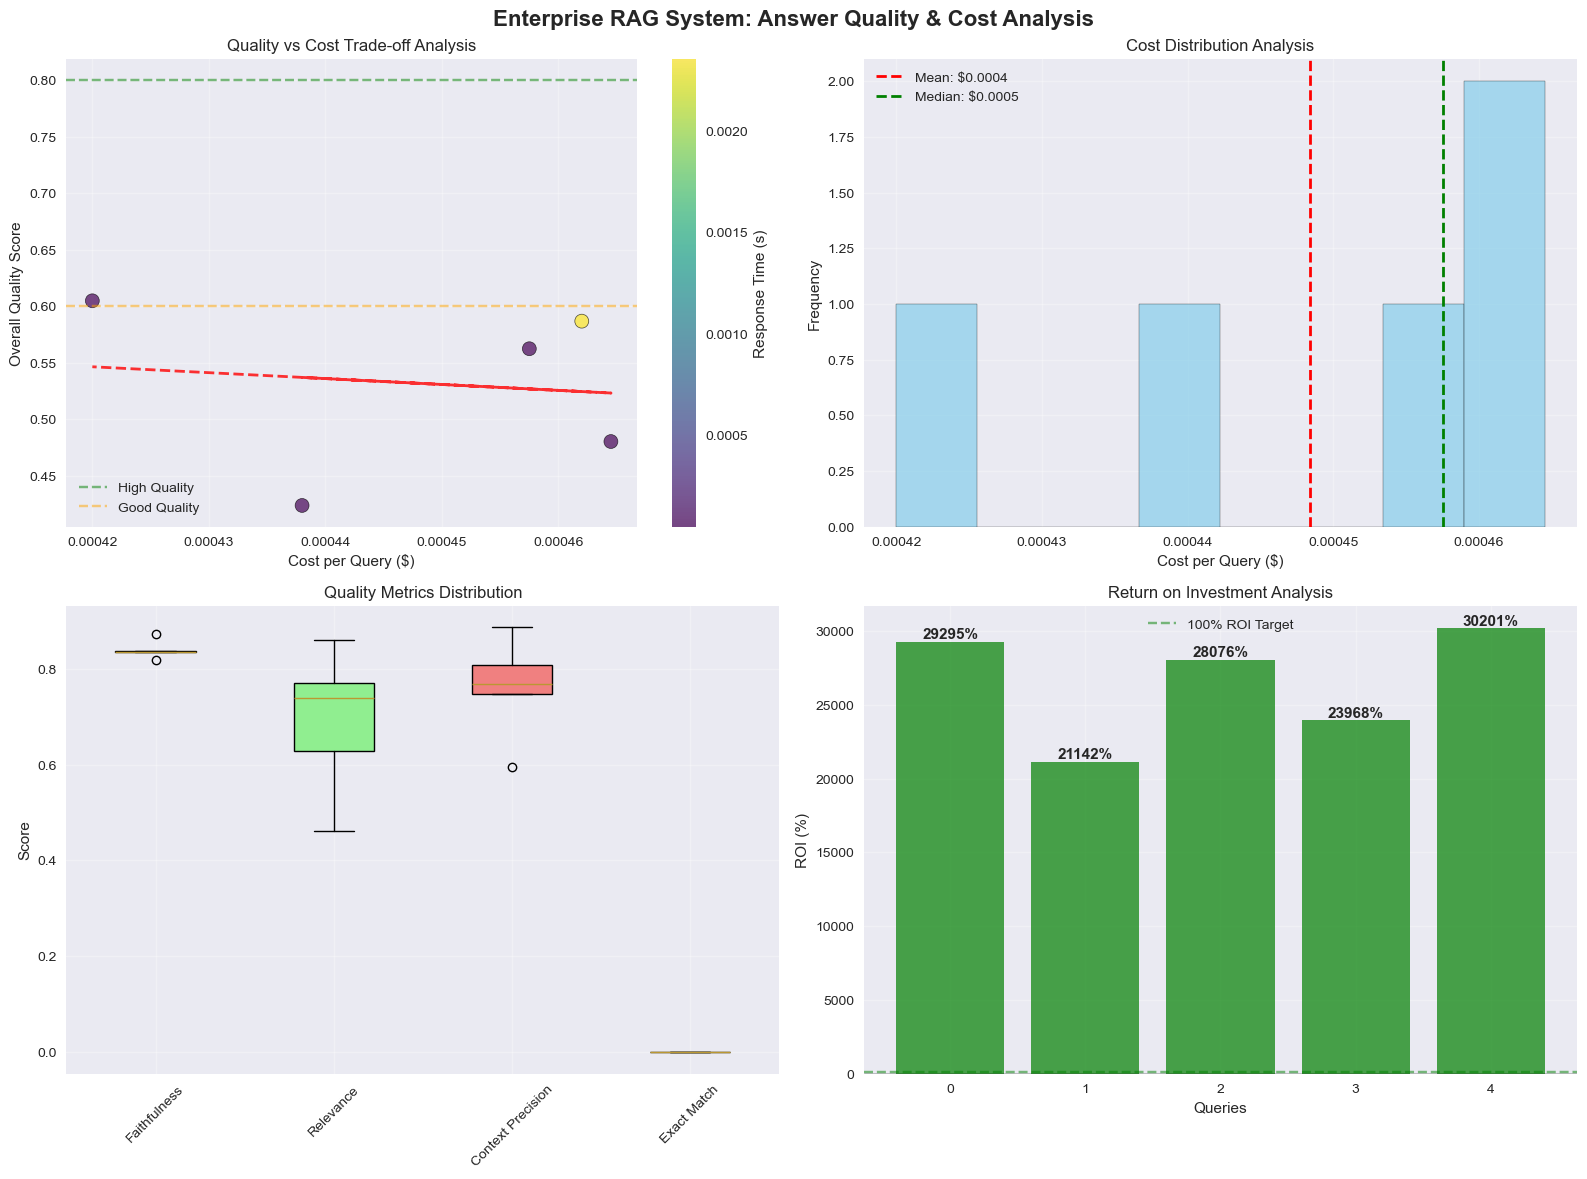


📊 ENTERPRISE SUMMARY REPORT

🎯 QUALITY PERFORMANCE:
   • Average Overall Quality: 0.532
   • Quality Consistency (Std Dev): 0.069
   • High Quality Queries (>0.8): 0/5

💰 COST ANALYSIS:
   • Average Cost per Query: $0.0004
   • Total Evaluation Cost: $0.0022
   • Cost Efficiency (Quality/Cost): 1185.61

⏱️  PERFORMANCE METRICS:
   • Average Response Time: 0.001s
   • Fastest Response: 0.000s
   • Slowest Response: 0.002s

💼 BUSINESS IMPACT:
   • Total Business Value: $1.33
   • Total Operational Cost: $0.0022
   • Overall ROI: 59180.5%
   • Positive ROI Queries: 5/5

🎯 KEY RECOMMENDATIONS:
   1. Most Efficient Query: 'How do I update my billing inf...' (Quality/Cost: 604.86)
   2. Least Efficient Query: 'What are your business hours?' (Quality/Cost: 423.73)


In [8]:
# Create comprehensive visualizations for enterprise reporting
def create_enterprise_visualizations(comprehensive_results):
    """Create professional visualizations for enterprise reporting."""
    
    # Prepare data
    queries = [result['query'][:30] + "..." if len(result['query']) > 30 else result['query'] 
               for result in comprehensive_results]
    quality_scores = [result['quality_metrics']['overall_quality'] for result in comprehensive_results]
    costs = [result['cost_breakdown']['total_cost'] for result in comprehensive_results]
    response_times = [result['response_time'] for result in comprehensive_results]
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Enterprise RAG System: Answer Quality & Cost Analysis', fontsize=16, fontweight='bold')
    
    # 1. Quality vs Cost Scatter Plot
    ax1 = axes[0, 0]
    scatter = ax1.scatter(costs, quality_scores, c=response_times, cmap='viridis', 
                         s=100, alpha=0.7, edgecolors='black', linewidth=0.5)
    
    # Add trend line
    z = np.polyfit(costs, quality_scores, 1)
    p = np.poly1d(z)
    ax1.plot(costs, p(costs), "r--", alpha=0.8, linewidth=2)
    
    ax1.set_xlabel('Cost per Query ($)')
    ax1.set_ylabel('Overall Quality Score')
    ax1.set_title('Quality vs Cost Trade-off Analysis')
    ax1.grid(True, alpha=0.3)
    
    # Add colorbar for response time
    cbar1 = plt.colorbar(scatter, ax=ax1)
    cbar1.set_label('Response Time (s)')
    
    # Add efficiency zones
    ax1.axhline(y=0.8, color='green', linestyle='--', alpha=0.5, label='High Quality')
    ax1.axhline(y=0.6, color='orange', linestyle='--', alpha=0.5, label='Good Quality')
    ax1.legend()
    
    # 2. Cost Distribution
    ax2 = axes[0, 1]
    ax2.hist(costs, bins=8, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.axvline(np.mean(costs), color='red', linestyle='--', linewidth=2, label=f'Mean: ${np.mean(costs):.4f}')
    ax2.axvline(np.median(costs), color='green', linestyle='--', linewidth=2, label=f'Median: ${np.median(costs):.4f}')
    ax2.set_xlabel('Cost per Query ($)')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Cost Distribution Analysis')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # 3. Quality Metrics Breakdown
    ax3 = axes[1, 0]
    
    # Extract individual metrics
    faithfulness_scores = [result['quality_metrics']['faithfulness'] for result in comprehensive_results]
    relevance_scores = [result['quality_metrics']['relevance'] for result in comprehensive_results]
    context_precision_scores = [result['quality_metrics']['context_precision'] for result in comprehensive_results]
    exact_match_scores = [result['quality_metrics']['exact_match'] for result in comprehensive_results]
    
    metrics_data = [faithfulness_scores, relevance_scores, context_precision_scores, exact_match_scores]
    metrics_labels = ['Faithfulness', 'Relevance', 'Context Precision', 'Exact Match']
    
    bp = ax3.boxplot(metrics_data, labels=metrics_labels, patch_artist=True)
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax3.set_ylabel('Score')
    ax3.set_title('Quality Metrics Distribution')
    ax3.grid(True, alpha=0.3)
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. ROI and Business Impact
    ax4 = axes[1, 1]
    
    # Calculate business value and ROI
    business_value_per_quality_point = 0.50
    business_values = [score * business_value_per_quality_point for score in quality_scores]
    rois = [((bv - cost) / max(cost, 0.001)) * 100 for bv, cost in zip(business_values, costs)]
    
    # Create bar plot for ROI
    bars = ax4.bar(range(len(queries)), rois, color=['green' if roi > 0 else 'red' for roi in rois], alpha=0.7)
    ax4.set_xlabel('Queries')
    ax4.set_ylabel('ROI (%)')
    ax4.set_title('Return on Investment Analysis')
    ax4.grid(True, alpha=0.3)
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax4.axhline(y=100, color='green', linestyle='--', alpha=0.5, label='100% ROI Target')
    
    # Add value labels on bars
    for i, (bar, roi) in enumerate(zip(bars, rois)):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + (5 if height > 0 else -10),
                f'{roi:.0f}%', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')
    
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Generate summary statistics
    print("\n" + "="*60)
    print("📊 ENTERPRISE SUMMARY REPORT")
    print("="*60)
    
    print(f"\n🎯 QUALITY PERFORMANCE:")
    print(f"   • Average Overall Quality: {np.mean(quality_scores):.3f}")
    print(f"   • Quality Consistency (Std Dev): {np.std(quality_scores):.3f}")
    print(f"   • High Quality Queries (>0.8): {sum(1 for score in quality_scores if score > 0.8)}/{len(quality_scores)}")
    
    print(f"\n💰 COST ANALYSIS:")
    print(f"   • Average Cost per Query: ${np.mean(costs):.4f}")
    print(f"   • Total Evaluation Cost: ${sum(costs):.4f}")
    print(f"   • Cost Efficiency (Quality/Cost): {np.mean(quality_scores) / np.mean(costs):.2f}")
    
    print(f"\n⏱️  PERFORMANCE METRICS:")
    print(f"   • Average Response Time: {np.mean(response_times):.3f}s")
    print(f"   • Fastest Response: {np.min(response_times):.3f}s")
    print(f"   • Slowest Response: {np.max(response_times):.3f}s")
    
    print(f"\n💼 BUSINESS IMPACT:")
    total_business_value = sum(business_values)
    total_cost = sum(costs)
    overall_roi = ((total_business_value - total_cost) / total_cost) * 100 if total_cost > 0 else 0
    
    print(f"   • Total Business Value: ${total_business_value:.2f}")
    print(f"   • Total Operational Cost: ${total_cost:.4f}")
    print(f"   • Overall ROI: {overall_roi:.1f}%")
    print(f"   • Positive ROI Queries: {sum(1 for roi in rois if roi > 0)}/{len(rois)}")
    
    # Recommendations
    print(f"\n🎯 KEY RECOMMENDATIONS:")
    
    # Find most and least efficient queries
    efficiency_scores = [quality / max(cost, 0.001) for quality, cost in zip(quality_scores, costs)]
    most_efficient_idx = np.argmax(efficiency_scores)
    least_efficient_idx = np.argmin(efficiency_scores)
    
    print(f"   1. Most Efficient Query: '{queries[most_efficient_idx]}' (Quality/Cost: {efficiency_scores[most_efficient_idx]:.2f})")
    print(f"   2. Least Efficient Query: '{queries[least_efficient_idx]}' (Quality/Cost: {efficiency_scores[least_efficient_idx]:.2f})")
    
    if np.mean(response_times) > 1.0:
        print(f"   3. Consider response time optimization - average {np.mean(response_times):.3f}s is above target")
    
    if np.std(quality_scores) > 0.2:
        print(f"   4. Improve quality consistency - high variance ({np.std(quality_scores):.3f}) indicates optimization opportunities")
    
    if overall_roi < 100:
        print(f"   5. Focus on cost optimization to improve ROI from {overall_roi:.1f}% to target 100%+")

# Create visualizations
create_enterprise_visualizations(comprehensive_results)


## 🎓 **Learning Outcomes and Next Steps**

### **What You've Accomplished**

Congratulations! You've successfully completed **Day 3, Exercise 2** and built a comprehensive answer quality and cost analysis framework that includes:

#### **✅ Core Achievements:**
1. **Basic Quality Metrics**: Implemented Exact Match (EM) and F1 scoring for answer evaluation
2. **Advanced RAGAS-Style Metrics**: Added faithfulness, relevance, and context precision evaluation
3. **Embedding-Based Analysis**: Integrated semantic similarity for sophisticated quality assessment
4. **Comprehensive Cost Tracking**: Built enterprise-grade cost analysis with LightLLM integration
5. **Cost-Quality Optimization**: Developed frameworks for balancing performance with operational costs

#### **🏢 Enterprise Skills Developed:**
- **Quality Assurance**: Automated evaluation systems for consistent answer quality
- **Cost Management**: Token tracking and optimization for sustainable operations
- **ROI Analysis**: Business value assessment and return on investment calculations
- **Performance Optimization**: Data-driven insights for system improvement

### **Key Metrics Mastered**

| Metric | Purpose | Enterprise Application |
|--------|---------|----------------------|
| **Exact Match (EM)** | Perfect answer accuracy | Ensures high-quality responses for critical queries |
| **F1 Score** | Partial match evaluation | Balances precision and recall for comprehensive assessment |
| **Faithfulness** | Context-answer consistency | Prevents hallucination and maintains factual accuracy |
| **Relevance** | Query-answer alignment | Ensures answers address user needs effectively |
| **Context Precision** | Efficient context utilization | Optimizes retrieval depth and reduces noise |
| **Cost per Query** | Operational efficiency | Budget planning and cost optimization |
| **ROI Analysis** | Business value assessment | Stakeholder communication and investment decisions |

### **Production Best Practices**

#### **🔧 Implementation Guidelines:**
- **Automated Evaluation**: Integrate quality metrics into CI/CD pipelines
- **Cost Monitoring**: Set up alerts for budget management and optimization
- **Quality Thresholds**: Define minimum acceptable quality standards
- **Performance Tracking**: Monitor trends and degradation over time

#### **📊 Business Alignment:**
- **Quality Standards**: Align metrics with user satisfaction and business outcomes
- **Cost Efficiency**: Balance quality improvements with operational costs
- **ROI Optimization**: Focus on high-impact improvements with measurable returns
- **Stakeholder Communication**: Use clear metrics for business decision-making

---

## 🚀 **Next Steps: Advanced Evaluation Techniques**

### **Immediate Follow-ups:**
1. **Day 3, Exercise 3**: Hallucination and Citation Validation
2. **Day 3, Exercise 4**: Agent Memory Enhancement
3. **Day 3, Exercise 5**: RAG-Integrated Agent with Failure Handling

### **Advanced Topics to Explore:**
- **Multi-Modal Evaluation**: Extend metrics to images, tables, and structured data
- **Real-Time Monitoring**: Live quality and cost tracking in production
- **A/B Testing Framework**: Statistical significance testing for improvements
- **Human-in-the-Loop**: Incorporating expert judgment into automated evaluation

### **Enterprise Integration:**
- **Dashboard Creation**: Real-time quality and cost monitoring
- **Alert Systems**: Proactive quality and cost management
- **Automated Optimization**: Self-tuning systems based on evaluation results
- **Compliance Reporting**: Audit trails and regulatory compliance

---

## 📚 **Additional Resources**

### **Recommended Reading:**
- [RAGAS: Automated Evaluation Framework](https://docs.ragas.io/)
- [OpenAI API Pricing and Cost Optimization](https://openai.com/pricing)
- [Enterprise LLM Evaluation Best Practices](https://docs.anthropic.com/claude/docs/evaluation-best-practices)
- [Cost-Quality Trade-offs in Production LLM Systems](https://arxiv.org/abs/2401.13181)

### **Tools and Frameworks:**
- **RAGAS**: Comprehensive RAG evaluation framework
- **LangSmith**: LangChain evaluation and monitoring
- **Weights & Biases**: ML experiment tracking and evaluation
- **MLflow**: Model evaluation and deployment tracking

---

**🎯 You're now equipped with enterprise-grade answer quality and cost analysis skills for building and optimizing production RAG systems!**
